In [3]:
from google.colab import files
uploaded = files.upload()

Saving loan.csv to loan.csv


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
data = pd.read_csv("loan.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


***Removing the columns which has all the values as NA*** <br>
Creating a new Data Frame with data

In [3]:
data_without_all_na=data[data.columns[~data.isnull().all()]]


Once we remove all the columns which have only NA values, we are left with 55 columns

In [4]:
data_without_all_na.shape

(39717, 57)

* List the count of NA in each column. <br>
* Which shows that emp_title, emp_length, desc, title, mths_since_last_delinq,mths_since_last_record,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens <br>
* Based on the count of NA in each column we can drop following columns <br>
desc, mths_since_last_delinq,mths_since_last_record,next_pymnt_d


In [5]:
data_without_all_na.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [6]:
#Dropping columns desc, mths_since_last_delinq,mths_since_last_record,next_pymnt_d
data_without_all_na=data_without_all_na.drop(columns={'desc', 'mths_since_last_delinq','mths_since_last_record','next_pymnt_d'}) 
data_without_all_na.isna().sum()


id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

* Check if we can fill in the NA values for other columns.
* We can see that there are 39678 of 0.0 in tax_liens column. So filling the other rows does not give us any benifit. So drop this column


In [7]:
#data_without_all_na.tax_liens.value_counts()
data_without_all_na=data_without_all_na.drop(columns={'tax_liens'})
#data_without_all_na.head()
data_without_all_na.isna().sum()


id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [8]:
#Checking for pub_rec_bankruptcies if we can fill nulls or remove the rows
data_without_all_na.pub_rec_bankruptcies.value_counts()
#Assign pub_rec_bankruptcies with 0.0 for all the pub_rec==0
data_without_all_na['pub_rec_bankruptcies'][data_without_all_na['pub_rec']==0]=0.0
# Removing the 20 records which has pub_rec_bankruptcies=NA
data_without_all_na=data_without_all_na[~data_without_all_na.pub_rec_bankruptcies.isna()]
#Removing records which have emp_length as NA
data_without_all_na=data_without_all_na[~data_without_all_na.emp_length.isna()]
# Dropping the emp_title as we have large list of unique values
data_without_all_na=data_without_all_na.drop(columns={'emp_title'})
#Drop the title column as we already have purpose column
data_without_all_na=data_without_all_na.drop(columns={'title'})
#Drop all the rows for revol_util is NA
data_without_all_na=data_without_all_na[~data_without_all_na.revol_util.isna()]
#Drop rows with last_credit_pull_d is NA
data_without_all_na=data_without_all_na[~data_without_all_na.last_credit_pull_d.isna()]
#Drop rows with last_pymnt_d is NA
data_without_all_na=data_without_all_na[~data_without_all_na.last_pymnt_d.isna()]
data_without_all_na.isna().sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_li

After the above excercise all the columns have zero NAs

**Cleaning the data** <br>
term - remove the "months" string <br>
int_rate - remove % character <br>
drop columns url, desc <br>

In [9]:
# ** removed url **
data_without_all_na=data_without_all_na.drop(columns={'url'}) 
# remove % from int_rate
data_without_all_na.int_rate=data_without_all_na.int_rate.apply(lambda x : x[:-1]) 
# remove "month"
data_without_all_na.term = data_without_all_na.term.apply(lambda x : x[:-7]) 
data_without_all_na.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [10]:
# Removing the current one from the Data set
# Considering only the "Charged-Off" and "Fully Paid"
data_without_all_na = data_without_all_na[data_without_all_na.loan_status != 'Current']
#extracting only charged off data
data_charged_off=data_without_all_na[data_without_all_na.loan_status == 'Charged Off']
data_fully_paid=data_without_all_na[data_without_all_na.loan_status == 'Fully Paid']
data_fully_paid.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.0,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.0,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.0,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.0,0.0,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.0,0.0,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


#***Univariate Analysis*** <br>
Analyse few columns individually
Seggregate into 
* Categorical
  <br>Ordered - emp_length,issue_d
  <br>Unordered - home_ownership,purpose,application_type
* Quantitative/Numeric - annual_inc, loan_amnt

***# Starting with Charged Off Data Set***

# **Now lets do analysis for emp_length column**

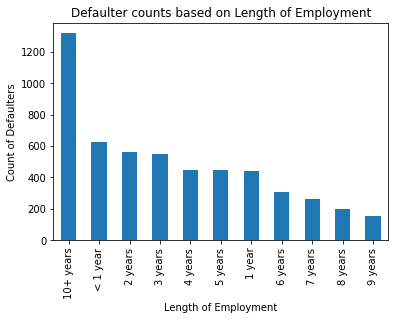

In [11]:
# Starting with Charged Off Data Set
#data_charged_off.head()
# Categorical Variables
# Ordered - emp_length,issue_d
# Unordered - grade, sub_grade, home_ownership, vaerification_status,purpose,application_type
import matplotlib.pyplot as plt
import seaborn as sns

data_charged_off.emp_length.value_counts().plot.bar()
plt.title("Defaulter counts based on Length of Employment")
plt.xlabel('Length of Employment')
plt.ylabel('Count of Defaulters')
plt.show()

**The above bar chart clearly shows that "10+ Years" has the maximum defaulters. Interesting to see Applicants with 6-9 years are less to default**

# **Now lets do analysis for home_ownership column**

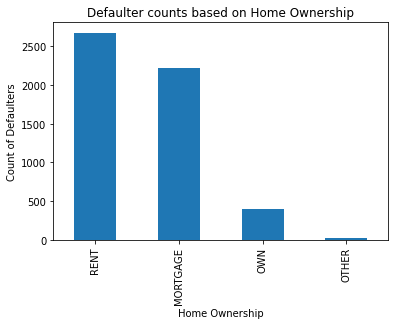

In [12]:
# Now lets do analysis for home_ownership

data_charged_off.home_ownership.value_counts().plot.bar()
plt.title("Defaulter counts based on Home Ownership")
plt.xlabel('Home Ownership')
plt.ylabel('Count of Defaulters')
plt.show()

**The above chart shows Applicants who is either in Rented House or with Mortgage are like to default**

# **Now lets do analysis for purpose column**

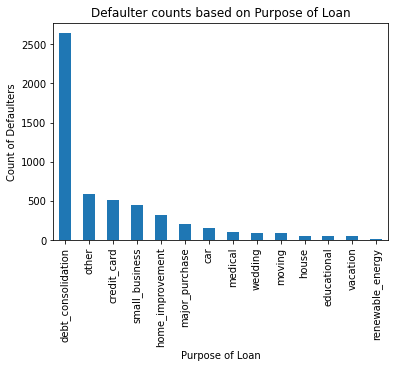

In [13]:
# Now lets do analysis for purpose
data_charged_off.purpose.value_counts().plot.bar()
plt.title("Defaulter counts based on Purpose of Loan")
plt.xlabel('Purpose of Loan')
plt.ylabel('Count of Defaulters')
plt.show()

**Here in the above chart shows that loan with "debt_consolidation" category likely to get defaulted** 

# **Now lets do analysis for issue_d column**

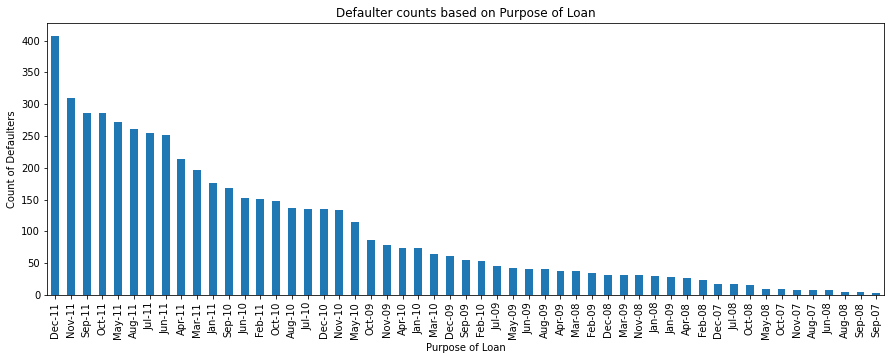

In [15]:
data_charged_off.issue_d.value_counts().plot.bar()
plt.title("Defaulter counts based on Purpose of Loan")
plt.xlabel('Purpose of Loan')
plt.ylabel('Count of Defaulters')
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

In the above chat we can see that Dec-11 is the issue month maximum default loans belong to. Lets see the trend of the count based on the Month

#**Trends**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


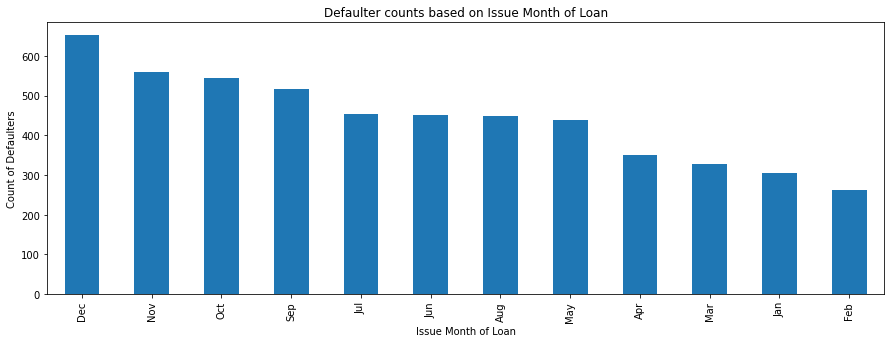

In [16]:
#This can be achieved by exrtacting issue_month and issue_year (two new columns)
data_charged_off['issue_month']=data_charged_off['issue_d'].apply(lambda x: x[0:3])
data_charged_off['issue_year']=data_charged_off['issue_d'].apply(lambda x: (2000+int(x[4:])))
data_charged_off.issue_month.value_counts().plot.bar()
plt.title("Defaulter counts based on Issue Month of Loan")
plt.xlabel('Issue Month of Loan')
plt.ylabel('Count of Defaulters')
plt.show()

This chart shows that loans which are issued in Dec are higher when compared to other months


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


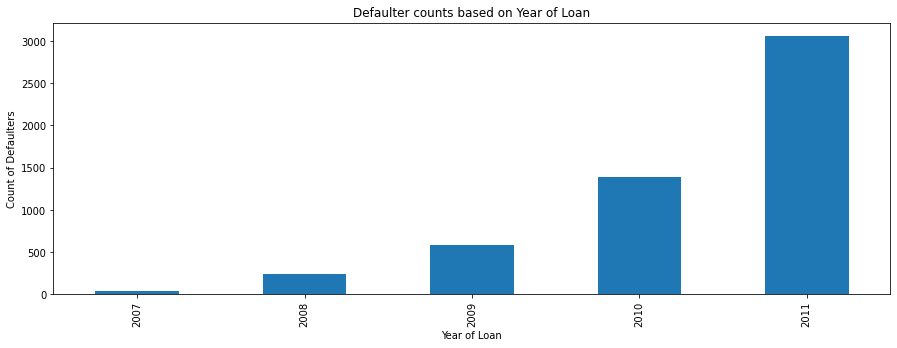

In [17]:
data_charged_off.issue_year=data_charged_off.issue_year.astype("int")
data_charged_off.issue_year.value_counts().sort_index().plot.bar()
plt.title("Defaulter counts based on Year of Loan")
plt.xlabel('Year of Loan')
plt.ylabel('Count of Defaulters')
plt.show()

**So based on the above chart we could see that count of defaulters have increased over the years.**

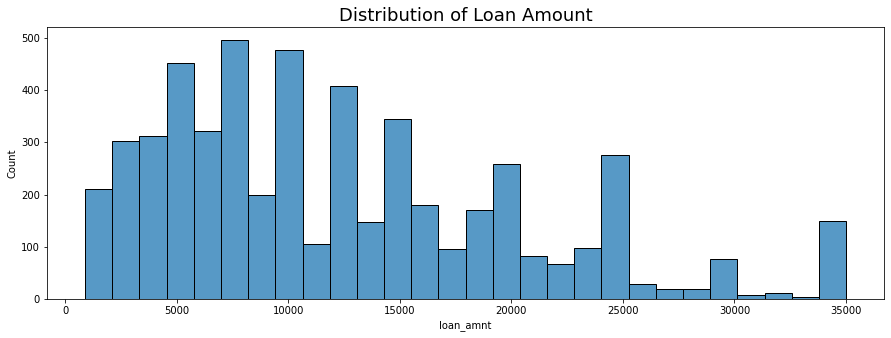

In [18]:
#data_charged_off.loan_amnt.value_counts()
sns.histplot(data_charged_off.loan_amnt)
plt.title("Distribution of Loan Amount", fontsize=18)
plt.show()


Based on the above we can could see that density is at from 900 to 25000. So defaults are more at this range

In [171]:
data_charged_off.loan_amnt.describe()

count     5309.000000
mean     12308.141835
std       8081.668320
min        900.000000
25%       6000.000000
50%      10000.000000
75%      17000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [174]:
data_charged_off.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5309 entries, 1 to 39653
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5309 non-null   int64  
 1   member_id                   5309 non-null   int64  
 2   loan_amnt                   5309 non-null   int64  
 3   funded_amnt                 5309 non-null   int64  
 4   funded_amnt_inv             5309 non-null   float64
 5   term                        5309 non-null   object 
 6   int_rate                    5309 non-null   object 
 7   installment                 5309 non-null   float64
 8   grade                       5309 non-null   object 
 9   sub_grade                   5309 non-null   object 
 10  emp_length                  5309 non-null   object 
 11  home_ownership              5309 non-null   object 
 12  annual_inc                  5309 non-null   float64
 13  verification_status         5309

In [182]:
data_charged_off.annual_inc.describe()

count    5.309000e+03
mean     6.352761e+04
std      4.829939e+04
min      4.080000e+03
25%      3.840000e+04
50%      5.400000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

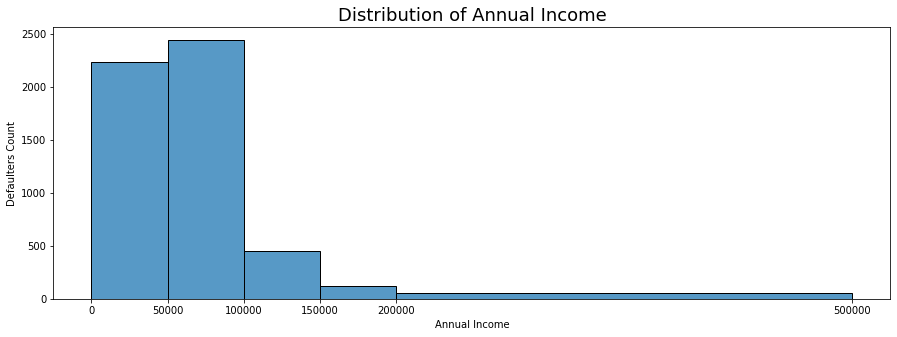

In [19]:
#data_charged_off.annual_inc.describe()

sns.histplot(data_charged_off.annual_inc,bins=[0,50000, 100000,150000,200000, 500000])
plt.title("Distribution of Annual Income", fontsize=18)
plt.xlabel("Annual Income")
plt.ylabel("Defaulters Count")
plt.xticks([0,50000,100000,150000,200000, 500000])
plt.show()

Trend shows that majority of the defaulters have Annual income < 100000

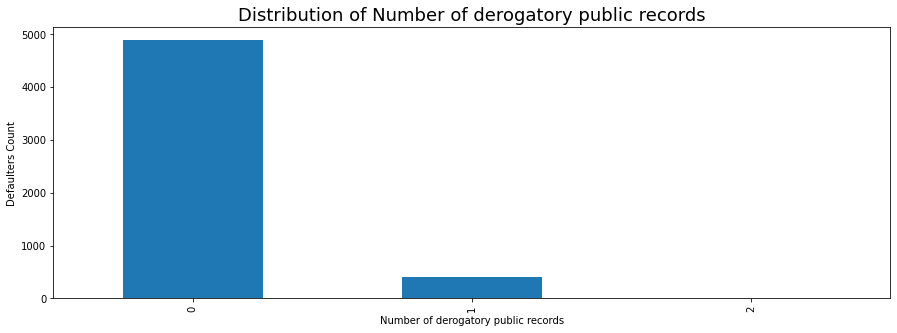

In [20]:
data_charged_off.pub_rec.value_counts().plot.bar()
plt.title("Distribution of Number of derogatory public records", fontsize=18)
plt.xlabel("Number of derogatory public records")
plt.ylabel("Defaulters Count")
plt.show()

Both the above two charts which depicts the Derogatory Public Records and Public Record Bankcruptcies show the Majority are at 0 and 0.0 respectively

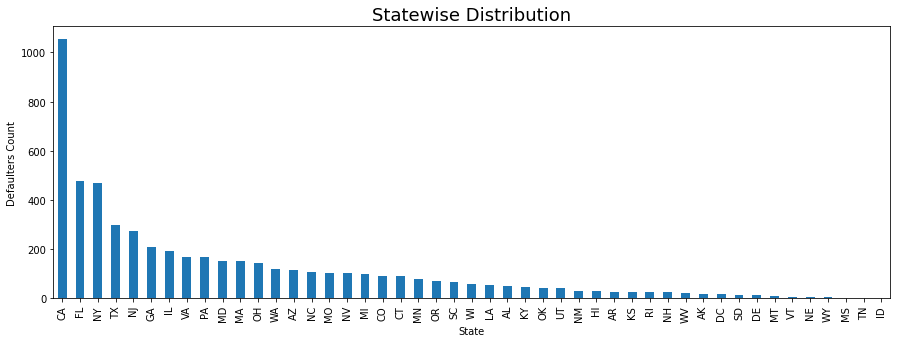

In [21]:
# Based on the State
data_charged_off.addr_state.value_counts().plot.bar()
plt.title("Statewise Distribution", fontsize=18)
plt.xlabel("State")
plt.ylabel("Defaulters Count")
plt.show()

This will give us an idea that majority of the applicants come from CA sate

#Segmented Univariate Analysis

Now lets take the data with "Charged Off" and "Fully Paid"

##Loan Status percentage w.r.t Loan Purpose

In [236]:
data_without_all_na.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

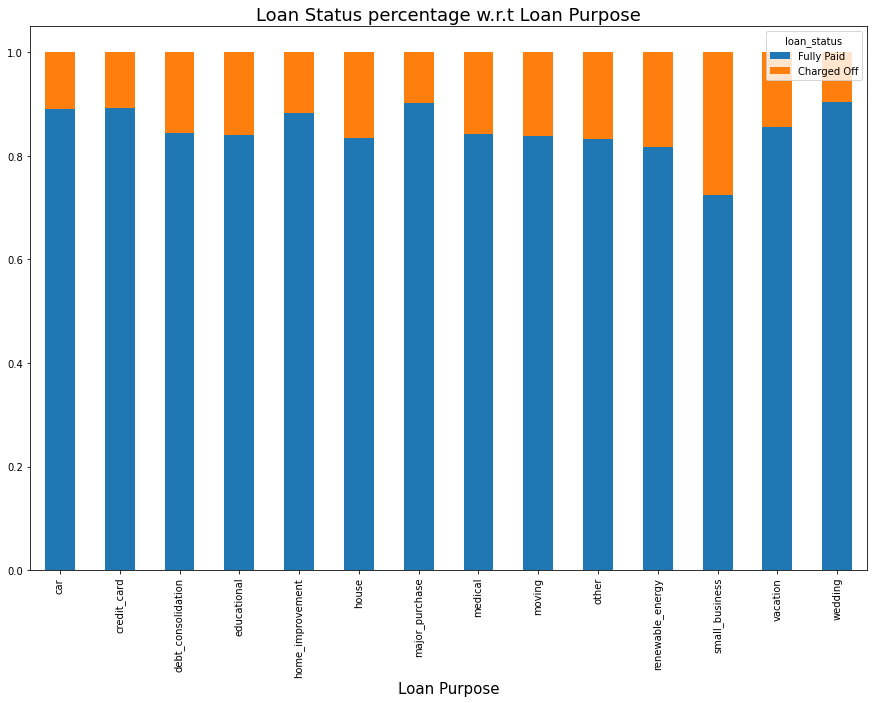

In [22]:
loan_purpose = pd.pivot_table(data = data_without_all_na, index="purpose", columns="loan_status", values="id", aggfunc=sum)
loan_purpose_perc=loan_purpose[['Fully Paid', 'Charged Off']].apply(lambda x: x/x.sum(), axis=1)
loan_purpose_perc.plot(kind="bar", stacked="True", figsize=[15,10])
plt.title("Loan Status percentage w.r.t Loan Purpose", fontsize=18)
plt.xlabel("Loan Purpose", fontsize=15)
plt.show()


We can see that "small_business" has maximum "Charged Off". Which should have major focus while giving loans

#Loan Status percentage w.r.t Loan Term

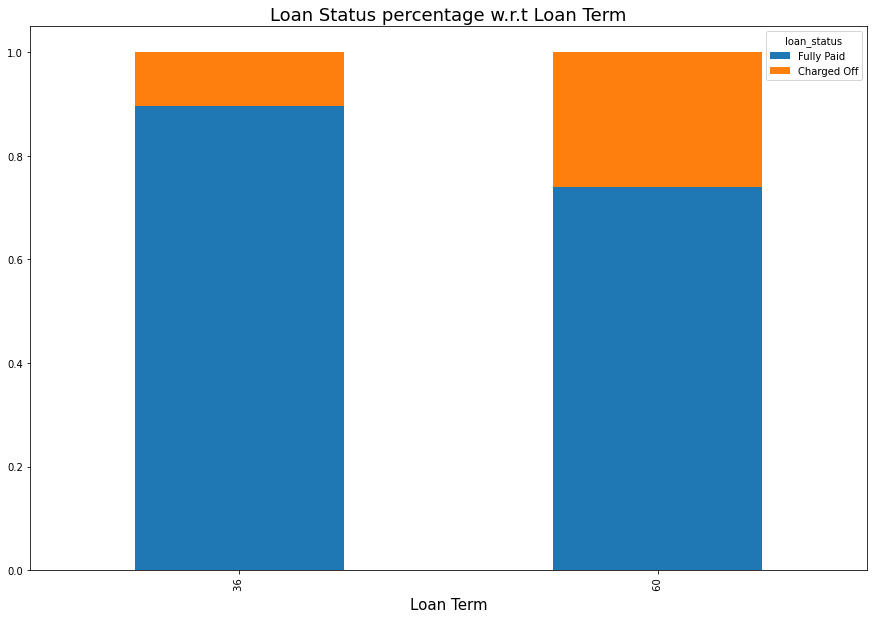

In [23]:
loan_purpose = pd.pivot_table(data = data_without_all_na, index="term", columns="loan_status", values="id", aggfunc=sum)
loan_purpose_perc=loan_purpose[['Fully Paid', 'Charged Off']].apply(lambda x: x/x.sum(), axis=1)
loan_purpose_perc.plot(kind="bar", stacked="True", figsize=[15,10])
plt.title("Loan Status percentage w.r.t Loan Term", fontsize=18)
plt.xlabel("Loan Term", fontsize=15)
plt.show()

This shows that loan with 60 terms have maximum "Charged Off"

#Loan Status percentage w.r.t State of the Applicant

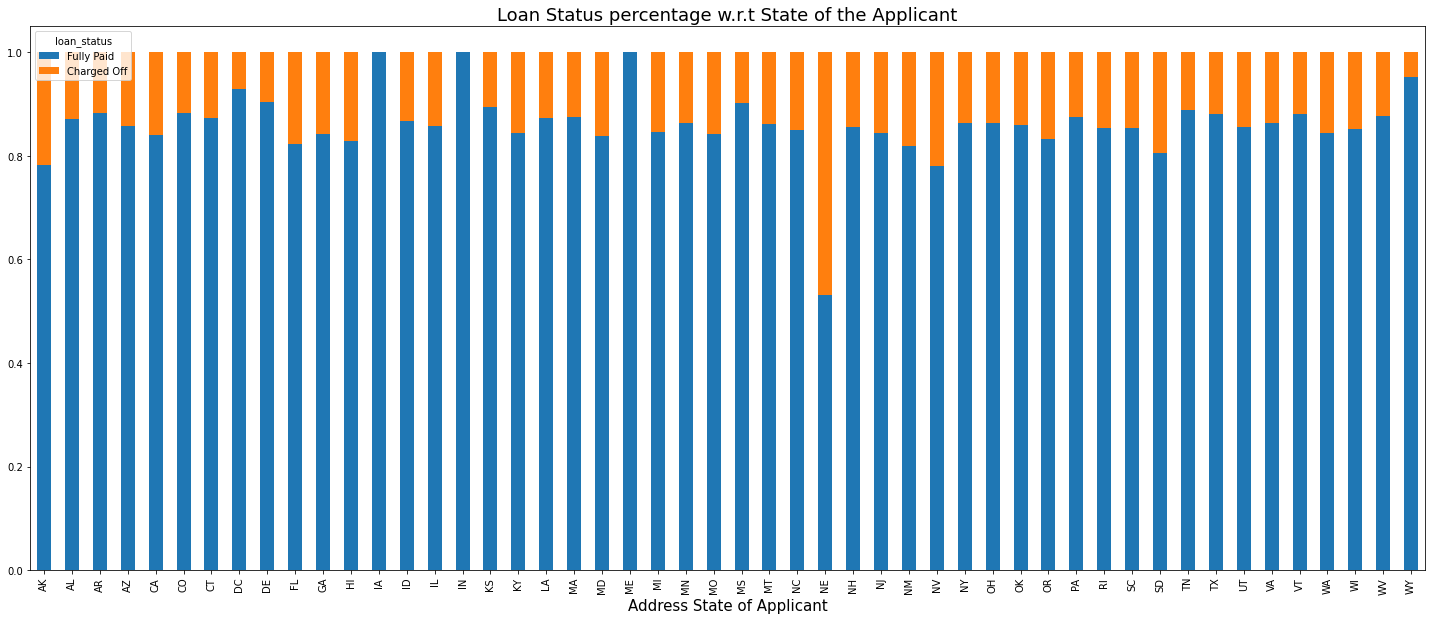

In [24]:
loan_purpose = pd.pivot_table(data = data_without_all_na, index="addr_state", columns="loan_status", values="id", aggfunc=sum)
loan_purpose_perc=loan_purpose[['Fully Paid', 'Charged Off']].apply(lambda x: x/x.sum(), axis=1)
loan_purpose_perc.plot(kind="bar", stacked="True", figsize=[25,10])
plt.title("Loan Status percentage w.r.t State of the Applicant", fontsize=18)
plt.xlabel("Address State of Applicant", fontsize=15)
plt.show()

* All Applicants from states "IA"/"IN"/"ME", "Fully Paid"
* Maximum no of "Charged Off" is from "NE"

#Bivariate Analysis

In [25]:
#Drop columns 'out_prncp', 'out_prncp_inv','collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt'
data_without_all_na=data_without_all_na.drop(columns={'out_prncp', 'out_prncp_inv','collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt'})

In [26]:

corr = data_without_all_na.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1.000000,0.993488,0.124616,0.135264,0.236421,0.079226,0.008719,0.090554,-0.008037,-0.040447,0.017145,-0.014876,0.000870,0.039900,0.114149,0.199242,0.096314,0.126703,-0.054524,0.039631,-0.010333,0.144824,-0.001719
member_id,0.993488,1.000000,0.124715,0.134604,0.246514,0.074346,0.009832,0.091892,-0.007440,-0.045425,0.014734,-0.014217,-0.002370,0.042348,0.115865,0.210007,0.097442,0.130375,-0.057077,0.037408,-0.012280,0.145263,-0.000820
loan_amnt,0.124616,0.124715,1.000000,0.981549,0.937259,0.931526,0.266043,0.060814,-0.033581,0.012746,0.172723,-0.045789,0.312956,0.254405,0.882861,0.848071,0.846852,0.728092,0.047697,0.142819,0.076558,0.473708,-0.030681
funded_amnt,0.135264,0.134604,0.981549,1.000000,0.955779,0.957638,0.261718,0.060676,-0.033691,0.012721,0.171260,-0.046273,0.305684,0.248659,0.900035,0.865309,0.865516,0.736495,0.050118,0.143359,0.078247,0.477745,-0.031675
funded_amnt_inv,0.236421,0.246514,0.937259,0.955779,1.000000,0.904553,0.249027,0.069368,-0.039958,-0.002696,0.158134,-0.045790,0.285135,0.240879,0.875049,0.910037,0.838891,0.726063,0.029967,0.131333,0.064070,0.468080,-0.032679
installment,0.079226,0.074346,0.931526,0.957638,0.904553,1.000000,0.264451,0.050241,-0.021579,0.010916,0.168561,-0.041803,0.308842,0.228106,0.859319,0.817881,0.849020,0.641408,0.058601,0.121225,0.077026,0.412271,-0.028787
annual_inc,0.008719,0.009832,0.266043,0.261718,0.249027,0.264451,1.000000,-0.123933,0.021368,0.036219,0.154019,-0.014130,0.276340,0.233045,0.252881,0.241921,0.253375,0.182356,0.006097,0.022394,0.016215,0.140967,-0.012177
dti,0.090554,0.091892,0.060814,0.060676,0.069368,0.050241,-0.123933,1.000000,-0.034730,0.000295,0.289061,-0.003826,0.227395,0.229161,0.058063,0.065257,0.035469,0.102479,-0.011507,0.025280,0.010749,0.008715,0.007742
delinq_2yrs,-0.008037,-0.007440,-0.033581,-0.033691,-0.039958,-0.021579,0.021368,-0.034730,1.000000,0.007852,0.010794,0.009762,-0.054935,0.066137,-0.024500,-0.030957,-0.039789,0.022647,0.029490,0.012187,0.013874,-0.013307,0.004559
inq_last_6mths,-0.040447,-0.045425,0.012746,0.012721,-0.002696,0.010916,0.036219,0.000295,0.007852,1.000000,0.094412,0.022413,-0.021206,0.114521,-0.007435,-0.017754,-0.020356,0.026885,0.031295,0.017898,0.011815,0.028522,0.013571


###Impact of Loan Amount on Annual Income 

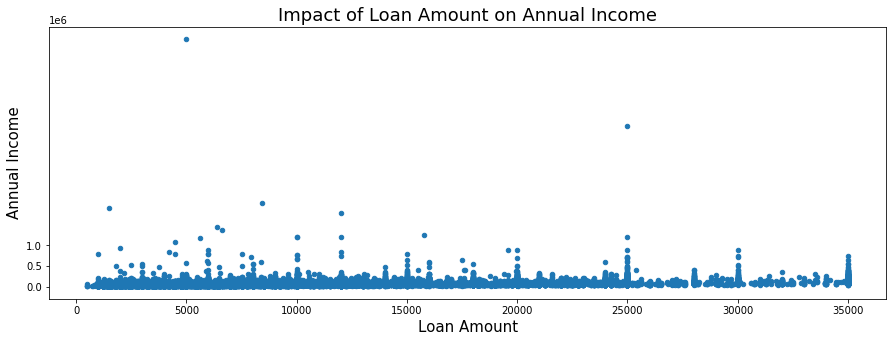

In [28]:
data_without_all_na.plot.scatter(x='loan_amnt', y='annual_inc')
plt.title("Impact of Loan Amount on Annual Income", fontsize=18)
plt.yticks([0,500000, 1000000])
plt.xlabel("Loan Amount", fontsize=15)
plt.ylabel("Annual Income", fontsize=15)
plt.show()

#Impact of dti on Loan Amount

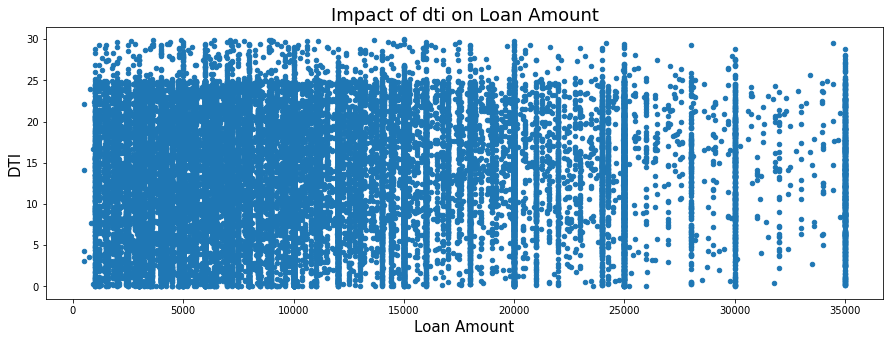

In [29]:
data_without_all_na.plot.scatter(x='loan_amnt', y='dti')
plt.title("Impact of dti on Loan Amount", fontsize=18)
plt.xlabel("Loan Amount", fontsize=15)
plt.ylabel("DTI", fontsize=15)
plt.show()

#Impact of Number of derogatory public records on Loan Amount

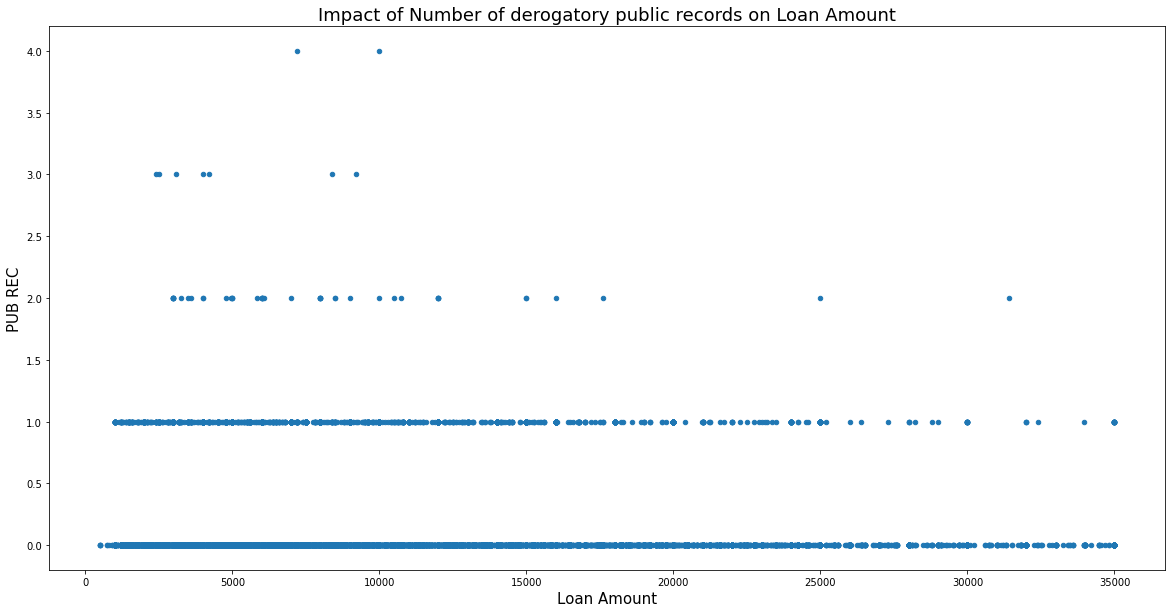

In [277]:
data_without_all_na.plot.scatter(x='loan_amnt', y='pub_rec')
plt.title("Impact of Number of derogatory public records on Loan Amount", fontsize=18)
plt.xlabel("Loan Amount", fontsize=15)
plt.ylabel("PUB REC", fontsize=15)
plt.show()